In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("mission_launches.csv")

In [21]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Eliminating unvaluable columns

In [23]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [24]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success



## We turn column called "Date" to DateTime type so we can work better.

In [25]:
df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4198 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    object             
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 236.6+ KB



## We turn column price to Float type so we can work better.

In [26]:
df['Price'] = df['Price'].str.replace(',','').astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4198 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB



## We substitute the null values on price column with the avg.

In [27]:
df['Price'].fillna(df['Price'].mean(), inplace=True)


C:\Users\franc\AppData\Local\Temp\ipykernel_14564\2722717349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


## We eliminate null values from Date column.


In [28]:
nulls_in_column = df['Date'].isnull().sum()
print(nulls_in_column)

126


In [29]:
df = df.dropna(subset='Date')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4198 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4198 non-null   object             
 1   Location        4198 non-null   object             
 2   Date            4198 non-null   datetime64[ns, UTC]
 3   Detail          4198 non-null   object             
 4   Rocket_Status   4198 non-null   object             
 5   Price           4198 non-null   float64            
 6   Mission_Status  4198 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 262.4+ KB



## We add the column "Year" which will have the year of the launch.

In [31]:
year = df['Date'].dt.year
df['Year'] = year
df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.792199,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.000000,Success,2020
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.680000,Success,2020
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.500000,Success,2020
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,153.792199,Success,2020
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.000000,Success,2020
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.000000,Success,2020



## We add the column "Month" which will have the month of the launch.

In [32]:
month = df["Date"].dt.month
df["Month"] = month
df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.792199,Success,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.000000,Success,2020,7
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.680000,Success,2020,7
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.500000,Success,2020,7
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,153.792199,Success,2020,7
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.000000,Success,2020,7
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.000000,Success,2020,7


## We add the column with the country of the launch.

In [33]:
country = df['Location'].apply(lambda ctry: ctry.split(',')[-1].strip())
df['Country'] = country
df.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success,2020,8,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success,2020,8,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.792199,Success,2020,8,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success,2020,7,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.000000,Success,2020,7,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.680000,Success,2020,7,China
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.500000,Success,2020,7,Kazakhstan
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,153.792199,Success,2020,7,China
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.000000,Success,2020,7,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.000000,Success,2020,7,Japan


## Which organisation has launched more rockets?

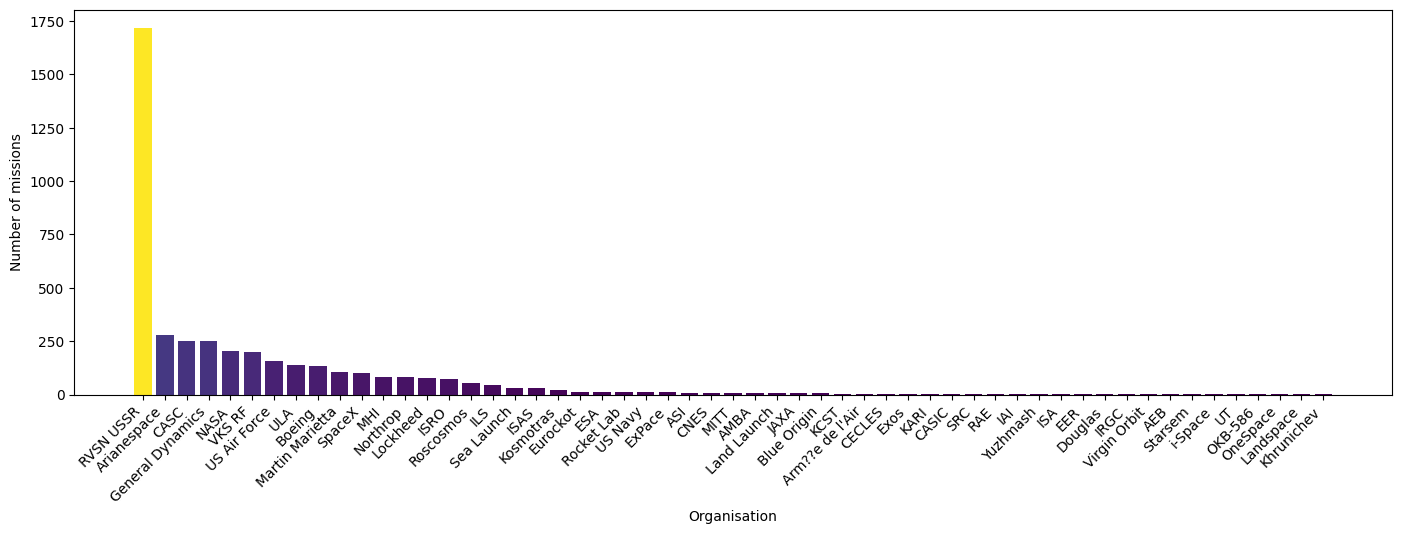

In [34]:
y = df['Organisation'].value_counts().values
plt.figure(figsize = (17,5))
plt.bar(df['Organisation'].value_counts().index,
        y,
        color=plt.cm.viridis(y / max(y)))
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Organisation')
plt.ylabel('Number of missions');

The organisation that launched the most rockets is RVSN USSR by far

## How many launches per year?


Text(0, 0.5, 'Number of Missions')

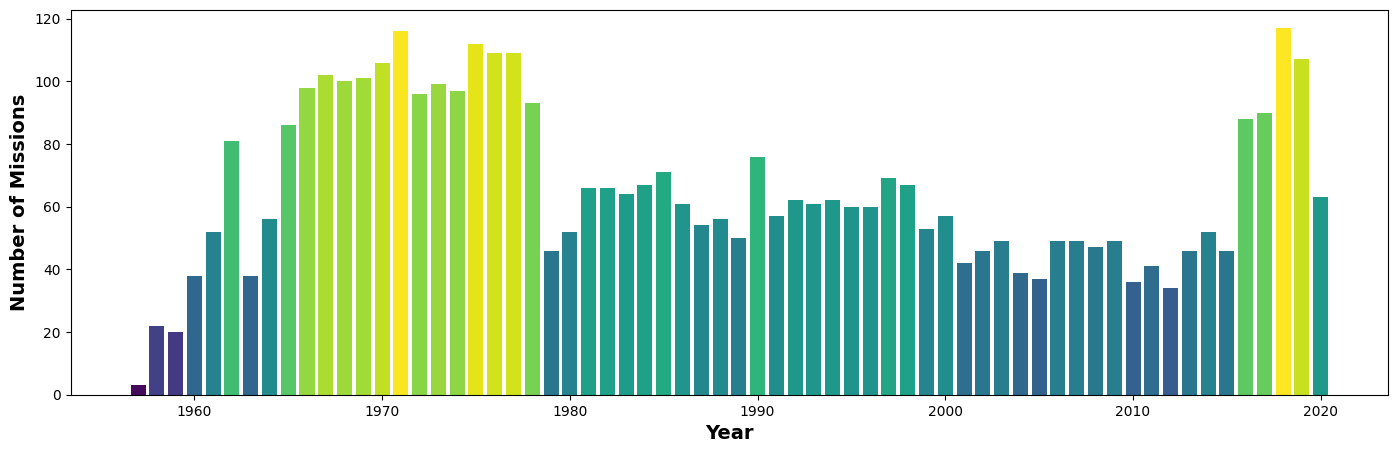

In [35]:
y = df.groupby('Year').size().values
plt.figure(figsize = (17,5))
plt.bar(df.groupby('Year').size().index,
        y     ,   color=plt.cm.viridis(y / max(y)))
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Missions', fontsize=14, fontweight='bold')

In [38]:
from sqlalchemy import engine
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Can we do it with SQL ?

In [39]:
q = """ 
SELECT Year, count(*) as Total_Launches
FROM df
GROUP BY Year
ORDER BY Year ASC

"""

num_of_missions = pysqldf(q)

num_of_missions


,Year,Total_Launches
0,1957,3
1,1958,22
2,1959,20
3,1960,38
4,1961,52
...,...,...
59,2016,88
60,2017,90
61,2018,117
62,2019,107


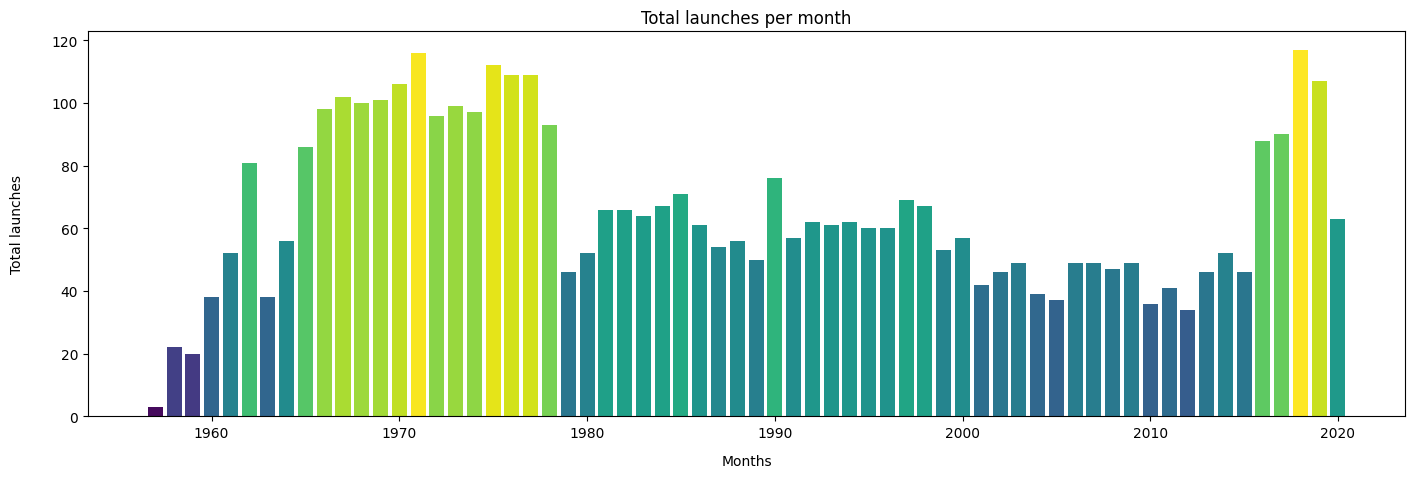

In [ ]:
plt.figure(figsize=(17, 5))
plt.bar(num_of_missions["Year"], num_of_missions["Total_Launches"],color=plt.cm.viridis(y / max(y)))


plt.xlabel("Months",labelpad=10)
plt.ylabel("Total launches",labelpad=20)
plt.title("Total launches per month")


plt.show()

## How did the average price change according to time?

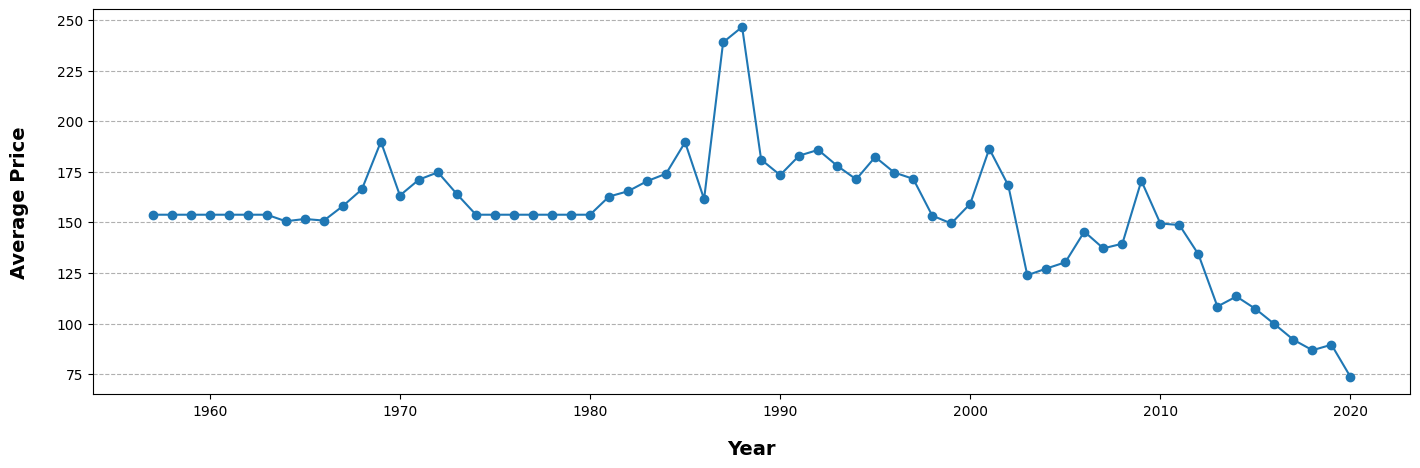

In [ ]:
plt.figure(figsize = (17,5))
plt.plot(df.groupby('Year')['Price'].mean().index,
         df.groupby('Year')['Price'].mean().values, marker= "o")
plt.xlabel('Year',fontsize=14, fontweight='bold',labelpad=15)
plt.ylabel('Average Price',fontsize=14, fontweight='bold',labelpad=20);
plt.grid(axis='y', linestyle='--')


## How can we do it with SQL?

In [ ]:
q = """ 
SELECT Year, AVG(Price) as Price
FROM df
GROUP BY Year
ORDER BY Year ASC

"""

average= pysqldf(q)

average

,Year,Price
0,1957,153.792199
1,1958,153.792199
2,1959,153.792199
3,1960,153.792199
4,1961,153.792199
...,...,...
59,2016,99.730486
60,2017,91.971364
61,2018,86.820118
62,2019,89.536867


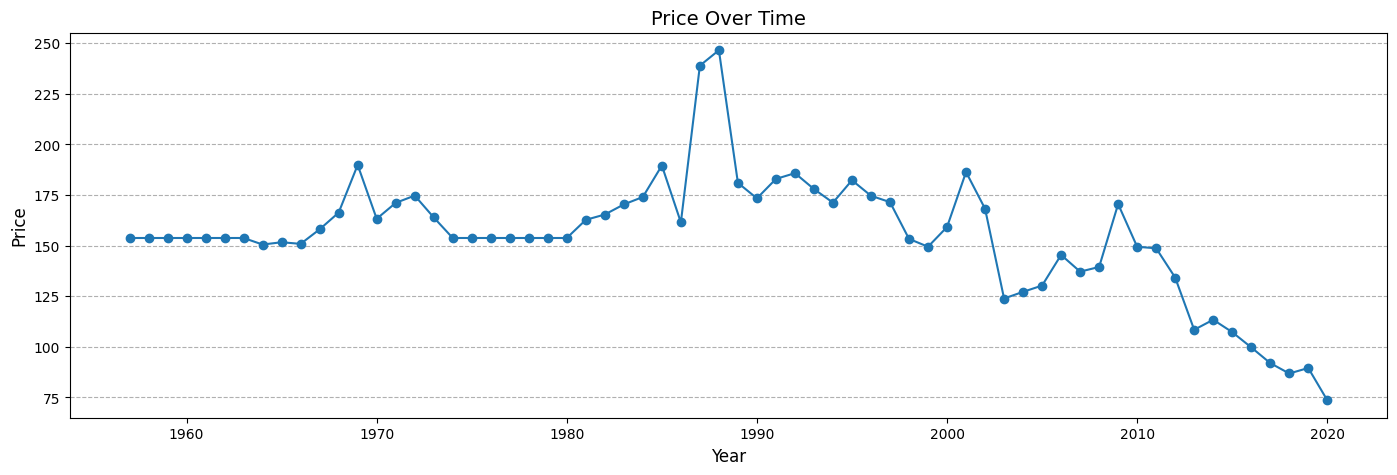

In [ ]:
plt.figure(figsize=(17, 5)) 
plt.plot(average['Year'], average['Price'], marker='o', linestyle='-')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Price Over Time', fontsize=14)


plt.grid(axis='y', linestyle='--')
plt.show()

## Which months are the most populars in terms of launches?

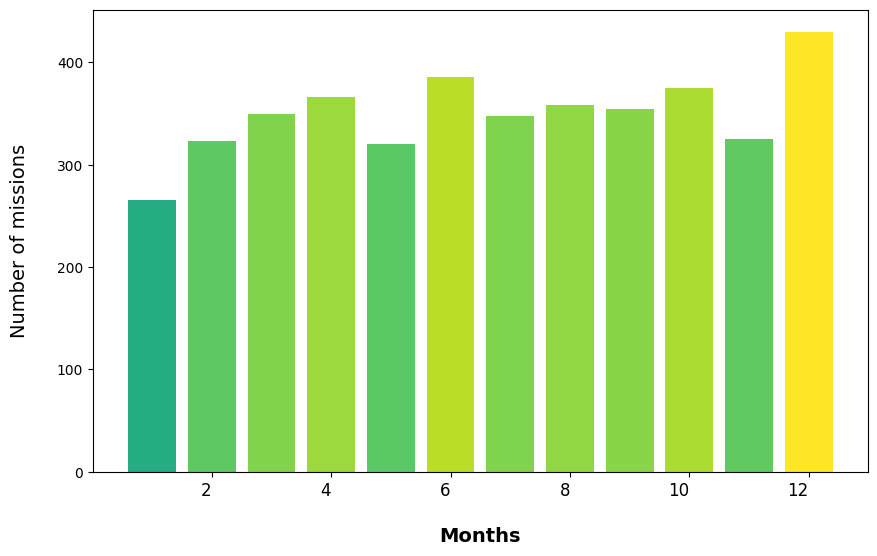

In [ ]:
y = df.groupby("Month").size().values
plt.figure(figsize = (10,6))
plt.bar(df.groupby("Month").size().index,
        y,
        color=plt.cm.viridis(y / max(y)))
plt.xticks(rotation = 0, ha = 'right',fontsize=12)
plt.xlabel('Months',fontsize=14, fontweight='bold',labelpad=20)
plt.ylabel('Number of missions',fontsize=14, labelpad=20);

The most popular month is december

## We can do the same visualization with SQL too!

In [ ]:
q = """ 
SELECT Month as Months, COUNT(*) AS Total_Launches
FROM df
GROUP BY 1
ORDER BY Months

"""

launches_per_month = pysqldf(q)

launches_per_month

,Months,Total_Launches
0,1,265
1,2,323
2,3,349
3,4,366
4,5,320
5,6,386
6,7,347
7,8,358
8,9,354
9,10,375


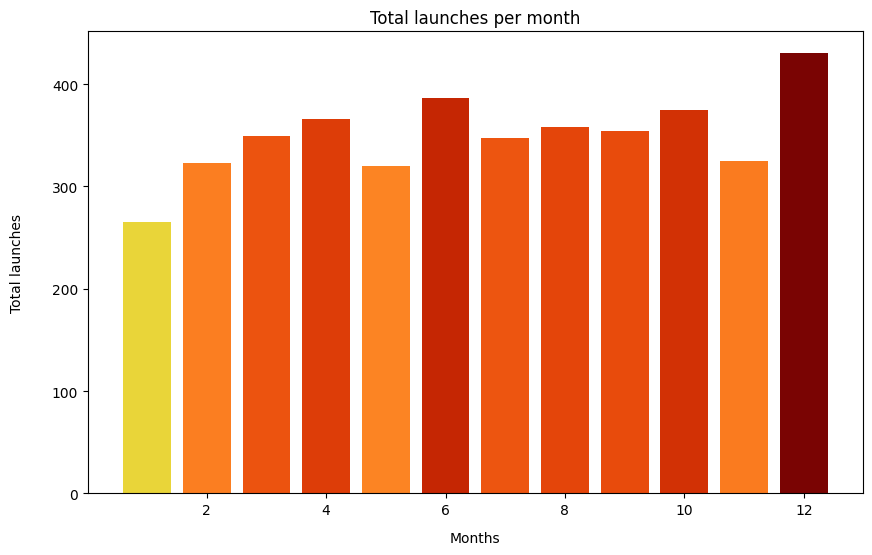

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(launches_per_month["Months"], launches_per_month["Total_Launches"],color=plt.cm.turbo(y / max(y)))


plt.xlabel("Months",labelpad=10)
plt.ylabel("Total launches",labelpad=20)
plt.title("Total launches per month")


plt.show()

In [ ]:
df.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success,2020,8,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success,2020,8,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.792199,Success,2020,8,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success,2020,7,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.000000,Success,2020,7,USA


## Failures against Succeses

In [ ]:
q = """ 
SELECT Mission_Status, count(*) as num
FROM df
GROUP BY Mission_Status

"""

success_rate = pysqldf(q)

success_rate

,Mission_Status,num
0,Failure,300
1,Partial Failure,102
2,Prelaunch Failure,2
3,Success,3794


Or with Pandas

In [ ]:
success_rates = df.groupby("Mission_Status").size()
success_rates

Mission_Status
Failure               300
Partial Failure       102
Prelaunch Failure       2
Success              3794
dtype: int64

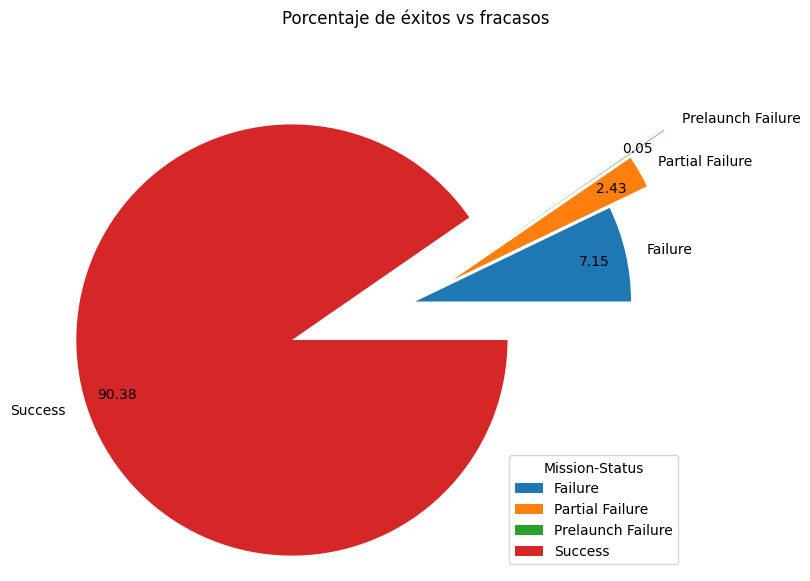

In [ ]:
plt.figure(figsize = (7,7))
plt.pie(success_rates, labels=success_rates.index,  explode=[0,0.2,0.4,0.6],autopct='%.2f',pctdistance=0.85)
plt.legend(title="Mission-Status", )
plt.title("Porcentaje de éxitos vs fracasos")
plt.show()